# Crime Data Reporting, Analysis and Visualisation - South Wales Police 

In [1]:
#Import of the relevant libraries

import glob
import os
import folium
from folium import plugins
import pandas as pd
import numpy as np


# Path to csv files
met_path = 'Data 20-21'

# Load the all files list
entries = os.listdir(met_path)
entries

['2020-01.csv',
 '2020-02.csv',
 '2020-03.csv',
 '2020-04.csv',
 '2020-05.csv',
 '2020-06.csv',
 '2020-07.csv',
 '2020-08.csv',
 '2020-09.csv',
 '2020-10.csv',
 '2020-11.csv',
 '2020-12.csv',
 '2021-01.csv',
 '2021-02.csv',
 '2021-03.csv',
 '2021-04.csv',
 '2021-05.csv',
 '2021-06.csv',
 '2021-07.csv',
 '2021-08.csv',
 '2021-09.csv']

In [2]:
# Load and Read CSV files
os.chdir(met_path)
source_csvs = glob.glob("*.csv")
temp_dflist = []
streetcrime_df = pd.DataFrame()

for csv in source_csvs:
    df = pd.read_csv(csv, index_col=None, header=0)
    temp_dflist.append(df)  
    


In [3]:
# Concat the all temp_dflist to DataFrame    
streetcrime_df = pd.concat(temp_dflist, axis=0, ignore_index=True)

#Drop the unnecessary columns
streetcrime_df.drop('Crime ID', axis=1, inplace=True)
streetcrime_df.drop('LSOA code', axis=1, inplace=True)
streetcrime_df.drop('Last outcome category', axis=1, inplace=True)
streetcrime_df.drop('Context', axis=1, inplace=True)

# Drop rows where 'Longitude','Latitude' details are null
streetcrime_df.dropna(subset=['Longitude','Latitude'], inplace=True)
streetcrime_df



,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [4]:
streetcrime_df_for_year = streetcrime_df #this additional data frame (streetcrime_df_for_year) was created for the purpose of analysing year 2021 data at latter part of the page. 


In [5]:
streetcrime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256219 entries, 0 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Month         256219 non-null  object 
 1   Reported by   256219 non-null  object 
 2   Falls within  256219 non-null  object 
 3   Longitude     256219 non-null  float64
 4   Latitude      256219 non-null  float64
 5   Location      256219 non-null  object 
 6   LSOA name     256219 non-null  object 
 7   Crime type    256219 non-null  object 
dtypes: float64(2), object(6)
memory usage: 17.6+ MB


In [6]:
streetcrime_df.shape


(256219, 8)

In [7]:
streetcrime_df.columns

Index(['Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude',
       'Location', 'LSOA name', 'Crime type'],
      dtype='object')

### Analysis 1 - Analysis of  monthly Total Crimes 

In [8]:
# Group crime count according to months
months_counts_df = streetcrime_df['Month'].value_counts()

months_counts_df

2020-05    15261
2020-04    14151
2021-03    13698
2020-06    13161
2020-07    12857
2020-10    12820
2020-08    12587
2021-01    12586
2020-11    12282
2020-09    12173
2021-04    11956
2021-05    11883
2021-02    11862
2021-06    11787
2021-07    11647
2021-08    11422
2021-09    11400
2020-01    10962
2020-02    10788
2020-12    10787
2020-03    10149
Name: Month, dtype: int64

In [9]:
# Reset the index
months_counts_df = months_counts_df.reset_index()

# Add Month and Count as new columns headings
months_counts_df.columns = ['Month', 'Counts']

# Sorting according to the order of 'Month'
months_counts_df = months_counts_df.sort_values(by ='Month')

months_counts_df

,Month,Counts
17,2020-01,10962
18,2020-02,10788
20,2020-03,10149
1,2020-04,14151
0,2020-05,15261
3,2020-06,13161
4,2020-07,12857
6,2020-08,12587
9,2020-09,12173
5,2020-10,12820


 ### Graph 1 :Monthly total crime movement for year 20/21

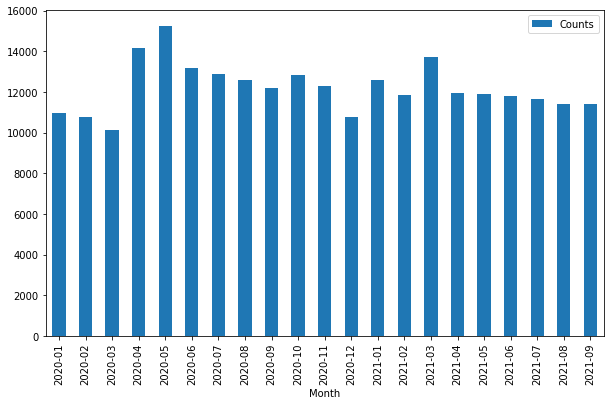

In [12]:
# Show it in the bar plot diagram
months_counts_df.plot(kind='bar' , x='Month', y='Counts', stacked=True, figsize= (10,6));

### Graph 2 : Monthly total crime movement 

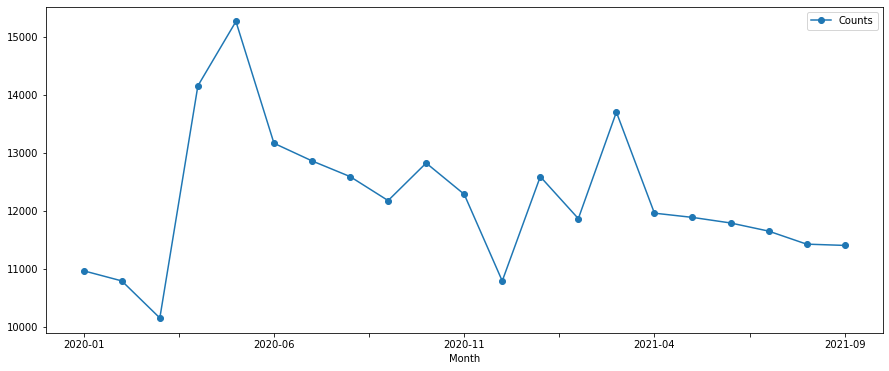

In [11]:
# Show the plot diagram
months_counts_df.plot(x='Month', y='Counts', figsize= (15,6), marker="o")

### Normalizing the data set

In [13]:
#Normalizing data using min-max methode

months_counts_df['minmax_norm_count'] = (months_counts_df.Counts - months_counts_df.Counts.min()) / ( months_counts_df.Counts.max() - months_counts_df.Counts.min())
months_counts_df

,Month,Counts,minmax_norm_count
17,2020-01,10962,0.159038
18,2020-02,10788,0.125000
20,2020-03,10149,0.000000
1,2020-04,14151,0.782864
0,2020-05,15261,1.000000
3,2020-06,13161,0.589202
4,2020-07,12857,0.529734
6,2020-08,12587,0.476917
9,2020-09,12173,0.395931
5,2020-10,12820,0.522496


### Graph 3 : Monthly total crime movement after normalise the data set

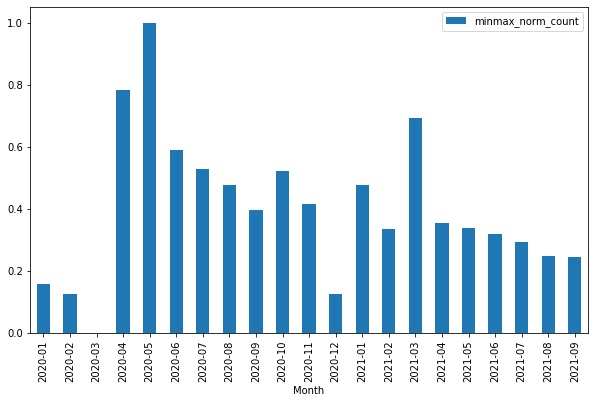

In [14]:
# Show it in the bar plot diagram
months_counts_df.plot(kind='bar' , x='Month', y='minmax_norm_count', stacked=True, figsize= (10,6));

### Graph 4 : Monthly total crime movement for normalise data set

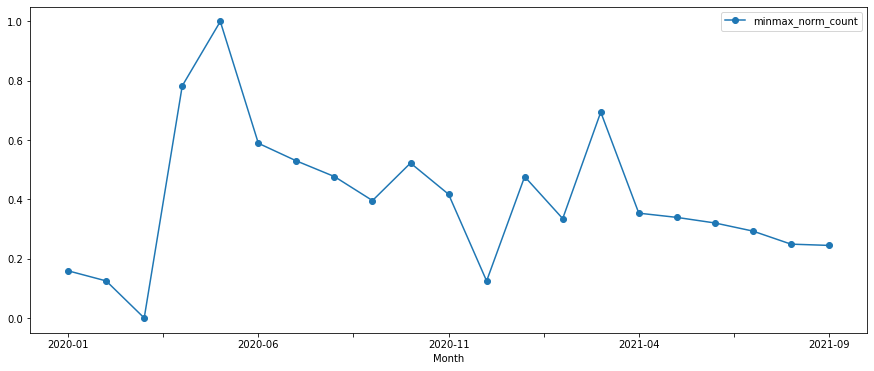

In [15]:
# Show the plot diagram
months_counts_df.plot(x='Month', y='minmax_norm_count', figsize= (15,6), marker="o")

### Analysis 2 - Analysis of crime types

In [16]:
# Count 'Crime Type' and create the dataframe group by 'Month'
crime_type_counts_to_month_df = streetcrime_df.groupby('Month')['Crime type'].value_counts().reset_index(name='Counts')
crime_type_counts_to_month_df

,Month,Crime type,Counts
0,2020-01,Violence and sexual offences,3630
1,2020-01,Anti-social behaviour,1813
2,2020-01,Criminal damage and arson,968
3,2020-01,Public order,937
4,2020-01,Shoplifting,809
...,...,...,...
289,2021-09,Other crime,183
290,2021-09,Bicycle theft,150
291,2021-09,Theft from the person,62
292,2021-09,Possession of weapons,56


In [17]:
crime_type_counts_to_month_normalize_df = crime_type_counts_to_month_df
crime_type_counts_to_month_normalize_df

,Month,Crime type,Counts
0,2020-01,Violence and sexual offences,3630
1,2020-01,Anti-social behaviour,1813
2,2020-01,Criminal damage and arson,968
3,2020-01,Public order,937
4,2020-01,Shoplifting,809
...,...,...,...
289,2021-09,Other crime,183
290,2021-09,Bicycle theft,150
291,2021-09,Theft from the person,62
292,2021-09,Possession of weapons,56


In [18]:
crime_total = crime_type_counts_to_month_normalize_df['Counts'].sum()
crime_total

256219

In [19]:
# Data Normalisation
crime_type_counts_to_month_normalize_df['normalize_count'] = (crime_type_counts_to_month_normalize_df.Counts / crime_total)*100
crime_type_counts_to_month_normalize_df

,Month,Crime type,Counts,normalize_count
0,2020-01,Violence and sexual offences,3630,1.416757
1,2020-01,Anti-social behaviour,1813,0.707598
2,2020-01,Criminal damage and arson,968,0.377802
3,2020-01,Public order,937,0.365703
4,2020-01,Shoplifting,809,0.315746
...,...,...,...,...
289,2021-09,Other crime,183,0.071423
290,2021-09,Bicycle theft,150,0.058544
291,2021-09,Theft from the person,62,0.024198
292,2021-09,Possession of weapons,56,0.021856


In [20]:
# Remove 'count' column  
crime_type_counts_to_month_normalize_df = pd.DataFrame(crime_type_counts_to_month_normalize_df, columns=['Month','Crime type','normalize_count'])

In [21]:
crime_type_counts_to_month_normalize_df

,Month,Crime type,normalize_count
0,2020-01,Violence and sexual offences,1.416757
1,2020-01,Anti-social behaviour,0.707598
2,2020-01,Criminal damage and arson,0.377802
3,2020-01,Public order,0.365703
4,2020-01,Shoplifting,0.315746
...,...,...,...
289,2021-09,Other crime,0.071423
290,2021-09,Bicycle theft,0.058544
291,2021-09,Theft from the person,0.024198
292,2021-09,Possession of weapons,0.021856


In [22]:
# Rearrange the table(Unstack) for relates to the 'Crime type' and 'Month'
transformed_normalize_df = crime_type_counts_to_month_normalize_df.set_index(['Month', 'Crime type'], drop = True).unstack('Crime type')
transformed_normalize_df

normalize_count                          \
Crime type Anti-social behaviour Bicycle theft  Burglary   
Month                                                      
2020-01                 0.707598      0.055812  0.197878   
2020-02                 0.726722      0.049567  0.179534   
2020-03                 0.820392      0.041371  0.175631   
2020-04                 2.854980      0.042151  0.139724   
2020-05                 2.984556      0.053080  0.122161   
2020-06                 1.935844      0.051128  0.149872   
2020-07                 1.522135      0.050738  0.181095   
2020-08                 1.265714      0.053860  0.172509   
2020-09                 1.258299      0.066349  0.160019   
2020-10                 1.719623      0.058934  0.156897   
2020-11                 1.565848      0.046835  0.167825   
2020-12                 1.414025      0.030052  0.141285   
2021-01                 2.191875      0.029272  0.136992   
2021-02                 2.035368      0.026540  0.128406   
2021-03                 2.143089      0.036687  0.154555   
2021-04                 1.463982      0.042151  0.168606   
2021-05                 1.184534      0.042542  0.143237   
2021-06                 1.009683      0.051128  0.163922   
2021-07                 0.913672      0.063617  0.152604   
2021-08                 0.850054      0.051128  0.161190   
2021-09                 0.895718      0.058544  0.178363   

                                                                        \
Crime type Criminal damage and arson     Drugs Other crime Other theft   
Month                                                                    
2020-01                     0.377802  0.156897    0.074155    0.277497   
2020-02                     0.385217  0.161971    0.067911    0.279839   
2020-03                     0.389511  0.128015    0.067520    0.246664   
2020-04                     0.304427  0.151043    0.063617    0.178753   
2020-05                     0.313794  0.177192    0.064788    0.218173   
2020-06                     0.341114  0.179924    0.069862    0.220124   
2020-07                     0.380924  0.195536    0.060885    0.259934   
2020-08                     0.424246  0.162751    0.065959    0.259153   
2020-09                     0.391072  0.159629    0.069472    0.229101   
2020-10                     0.355945  0.186169    0.065179    0.243932   
2020-11                     0.366093  0.174850    0.075326    0.243932   
2020-12                     0.320429  0.157287    0.059715    0.194365   
2021-01                     0.313404  0.179144    0.058934    0.190462   
2021-02                     0.269691  0.197878    0.059715    0.174460   
2021-03                     0.398878  0.160410    0.069082    0.215831   
2021-04                     0.369606  0.157287    0.074155    0.211538   
2021-05                     0.344237  0.172899    0.067520    0.235346   
2021-06                     0.375850  0.126454    0.072204    0.244713   
2021-07                     0.364922  0.126064    0.076887    0.238078   
2021-08                     0.381314  0.157287    0.062837    0.225588   
2021-09                     0.362580  0.115916    0.071423    0.255641   

                                                                     \
Crime type Possession of weapons Public order   Robbery Shoplifting   
Month                                                                 
2020-01                 0.024588     0.365703  0.018734    0.315746   
2020-02                 0.021466     0.351262  0.016002    0.340334   
2020-03                 0.018344     0.353994  0.016002    0.257202   
2020-04                 0.020685     0.380534  0.010148    0.139334   
2020-05                 0.024979     0.473033  0.014441    0.148311   
2020-06                 0.030833     0.483571  0.014831    0.172118   
2020-07                 0.024979     0.511672  0.017173    0.211538   
2020-08                 0.022637     0.558116  0.018734    0.210367   
2020-09           

### Graph 5 : Crime occurance according to the crime types

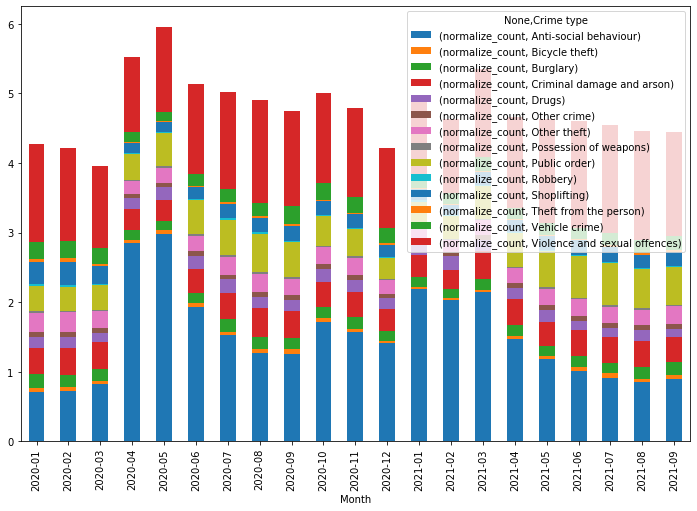

In [25]:
# Draw the plot bar diagram
ax = transformed_normalize_df.plot.bar(stacked=True, figsize=(12,8))

### Graph 6 : Monthly crime types movement 

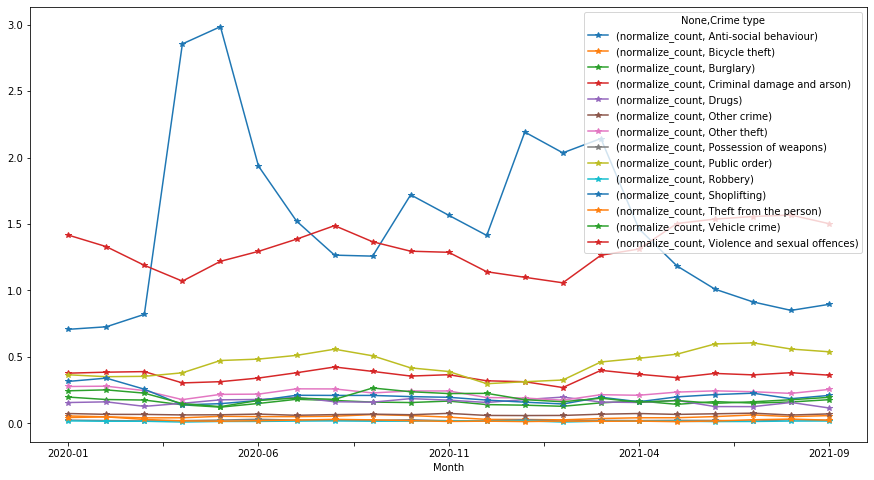

In [27]:
lines = transformed_normalize_df.plot.line(figsize=(15,8),marker="*")

### Analysis 3 : Analysis of total monthly crimes on YoY (2020/21)

In [28]:
# Rename the 'Month' column to 'YEAR-MONTH'
streetcrime_df = streetcrime_df.rename({'Month':'YEAR-MONTH'}, axis=1)
streetcrime_df

,YEAR-MONTH,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [29]:
# Get the year value from 'YEAR-MONTH' column(Substring) and add new column as 'YEAR'
streetcrime_df['YEAR'] = pd.DatetimeIndex(streetcrime_df['YEAR-MONTH']).year

# Get the month value from 'YEAR-MONTH' column(Substring) and add new column as 'MONTH'
streetcrime_df['MONTH'] = pd.DatetimeIndex(streetcrime_df['YEAR-MONTH']).month

streetcrime_df

,YEAR-MONTH,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,YEAR,MONTH
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences,2020,1
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour,2020,1
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour,2020,1
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson,2020,1
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order,2020,1
...,...,...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences,2021,9
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences,2021,9
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences,2021,9
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences,2021,9


In [30]:
# Create the dataframe by grouping 'Year' and 'Month' seperately
crime_type_counts_with_group_df = streetcrime_df.groupby('MONTH')['YEAR'].value_counts().reset_index(name='Counts')
crime_type_counts_with_group_df

,MONTH,YEAR,Counts
0,1,2021,12586
1,1,2020,10962
2,2,2021,11862
3,2,2020,10788
4,3,2021,13698
5,3,2020,10149
6,4,2020,14151
7,4,2021,11956
8,5,2020,15261
9,5,2021,11883


In [31]:
# Rearrange the table(Unstack) for relative the 'YEAR' and 'Month'
transformed_df2 = crime_type_counts_with_group_df.set_index(['MONTH', 'YEAR'], drop = True).unstack('YEAR')
transformed_df2

Counts         
YEAR      2020     2021
MONTH                  
1      10962.0  12586.0
2      10788.0  11862.0
3      10149.0  13698.0
4      14151.0  11956.0
5      15261.0  11883.0
6      13161.0  11787.0
7      12857.0  11647.0
8      12587.0  11422.0
9      12173.0  11400.0
10     12820.0      NaN
11     12282.0      NaN
12     10787.0      NaN

In [32]:
# add the index
transformed_df2.reset_index(level=0, inplace=True)

transformed_df2

MONTH   Counts         
YEAR           2020     2021
0        1  10962.0  12586.0
1        2  10788.0  11862.0
2        3  10149.0  13698.0
3        4  14151.0  11956.0
4        5  15261.0  11883.0
5        6  13161.0  11787.0
6        7  12857.0  11647.0
7        8  12587.0  11422.0
8        9  12173.0  11400.0
9       10  12820.0      NaN
10      11  12282.0      NaN
11      12  10787.0      NaN

In [33]:
# Reset the index
transformed_df2.reset_index(drop=True, inplace=True)
transformed_df2

MONTH   Counts         
YEAR           2020     2021
0        1  10962.0  12586.0
1        2  10788.0  11862.0
2        3  10149.0  13698.0
3        4  14151.0  11956.0
4        5  15261.0  11883.0
5        6  13161.0  11787.0
6        7  12857.0  11647.0
7        8  12587.0  11422.0
8        9  12173.0  11400.0
9       10  12820.0      NaN
10      11  12282.0      NaN
11      12  10787.0      NaN

In [34]:
# Rearrange the column
transformed_df2.columns = range(transformed_df2.shape[1])

transformed_df2

,0,1,2
0,1,10962.0,12586.0
1,2,10788.0,11862.0
2,3,10149.0,13698.0
3,4,14151.0,11956.0
4,5,15261.0,11883.0
5,6,13161.0,11787.0
6,7,12857.0,11647.0
7,8,12587.0,11422.0
8,9,12173.0,11400.0
9,10,12820.0,NaN


In [35]:
# Rename the columns
transformed_df2 = transformed_df2.rename(columns={0:'MONTH',1:'2020',2:'2021'})
transformed_df2

,MONTH,2020,2021
0,1,10962.0,12586.0
1,2,10788.0,11862.0
2,3,10149.0,13698.0
3,4,14151.0,11956.0
4,5,15261.0,11883.0
5,6,13161.0,11787.0
6,7,12857.0,11647.0
7,8,12587.0,11422.0
8,9,12173.0,11400.0
9,10,12820.0,NaN


In [36]:
# Remove the rows in NaN value
transformed_df2 = transformed_df2[transformed_df2['2021'].notna()]
transformed_df2

,MONTH,2020,2021
0,1,10962.0,12586.0
1,2,10788.0,11862.0
2,3,10149.0,13698.0
3,4,14151.0,11956.0
4,5,15261.0,11883.0
5,6,13161.0,11787.0
6,7,12857.0,11647.0
7,8,12587.0,11422.0
8,9,12173.0,11400.0


In [37]:
# Add month name to intiger month number
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
transformed_df2['MONTH'] = transformed_df2['MONTH'].apply(lambda x: look_up[x])
transformed_df2


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MONTH,2020,2021
0,Jan,10962.0,12586.0
1,Feb,10788.0,11862.0
2,Mar,10149.0,13698.0
3,Apr,14151.0,11956.0
4,May,15261.0,11883.0
5,Jun,13161.0,11787.0
6,Jul,12857.0,11647.0
7,Aug,12587.0,11422.0
8,Sep,12173.0,11400.0


### Graph 7 : YoY total crimes movement 

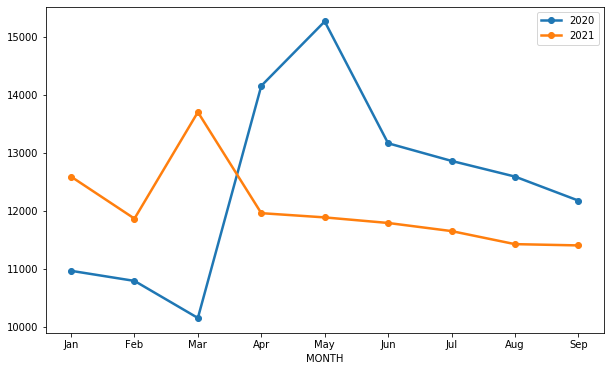

In [40]:
# Show the plot diagram
transformed_df2.set_index('MONTH').plot(figsize=(10, 6), linewidth=2.5, marker="o")


In [41]:
transformed_df2['2021'].mean()

12026.777777777777

In [42]:
transformed_df2['2021'].std()

717.5372425487366

In [43]:
transformed_df2['2020'].mean()

12454.333333333334

In [44]:
transformed_df2['2020'].std()

1651.9916010682377

### Graph 8 : YoY total crimes movement 

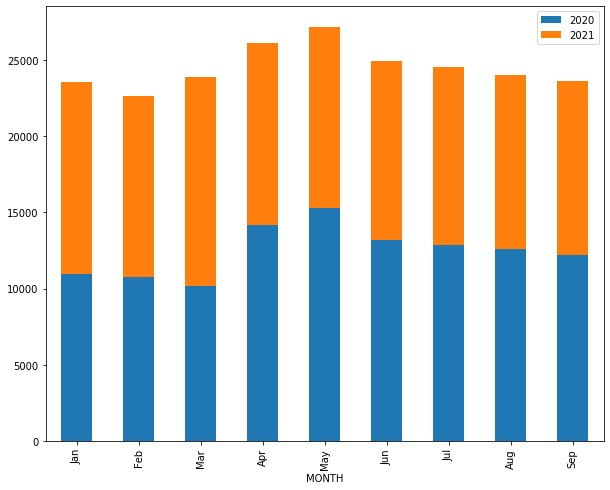

In [46]:
# Show the plot bar diagram
ax = transformed_df2.set_index('MONTH').plot.bar(stacked=True, figsize=(10,8))

### Analysis 4 : Analysis for the year 2021

In [47]:
streetcrime_df_for_year

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [52]:
streetcrime_df_2021 = streetcrime_df_for_year[streetcrime_df_for_year['Month'] >= '2021-01']
streetcrime_df_2021

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
150755,2021-01,South Wales Police,South Wales Police,-3.156006,51.766526,On or near Southlands,Blaenau Gwent 005B,Other crime
150756,2021-01,South Wales Police,South Wales Police,-3.245889,51.776739,On or near Nightclub,Blaenau Gwent 006E,Violence and sexual offences
150757,2021-01,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour
150758,2021-01,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
150759,2021-01,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [53]:
streetcrime_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108241 entries, 150755 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Month         108241 non-null  object 
 1   Reported by   108241 non-null  object 
 2   Falls within  108241 non-null  object 
 3   Longitude     108241 non-null  float64
 4   Latitude      108241 non-null  float64
 5   Location      108241 non-null  object 
 6   LSOA name     108241 non-null  object 
 7   Crime type    108241 non-null  object 
dtypes: float64(2), object(6)
memory usage: 7.4+ MB


### Analysis 5 : Crime analysis for the month of September 2020 vs 2021

In [58]:
# Create Dataframe only for Sep 2021 (2021-09)
streetcrime_month_2021_df = streetcrime_df_2021[streetcrime_df_2021.Month == '2021-09']
streetcrime_month_2021_df

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
250508,2021-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
250509,2021-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
250510,2021-09,South Wales Police,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Bridgend 001A,Anti-social behaviour
250511,2021-09,South Wales Police,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Bridgend 001A,Anti-social behaviour
250512,2021-09,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Anti-social behaviour
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [59]:
streetcrime_month_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11400 entries, 250508 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         11400 non-null  object 
 1   Reported by   11400 non-null  object 
 2   Falls within  11400 non-null  object 
 3   Longitude     11400 non-null  float64
 4   Latitude      11400 non-null  float64
 5   Location      11400 non-null  object 
 6   LSOA name     11400 non-null  object 
 7   Crime type    11400 non-null  object 
dtypes: float64(2), object(6)
memory usage: 801.6+ KB


In [60]:
# Count the occurence according to the 'Crime Type'
streetcrime_month_2021_df = streetcrime_month_2021_df["Crime type"].value_counts().rename_axis('Crime type').to_frame('Counts')
print(streetcrime_month_2021_df)

                              Counts
Crime type                          
Violence and sexual offences    3849
Anti-social behaviour           2295
Public order                    1380
Criminal damage and arson        929
Other theft                      655
Shoplifting                      539
Vehicle crime                    502
Burglary                         457
Drugs                            297
Other crime                      183
Bicycle theft                    150
Theft from the person             62
Possession of weapons             56
Robbery                           46


In [61]:
# ReIndexing and rename the columns
streetcrime_month_2021_df = streetcrime_month_2021_df.reset_index()
streetcrime_month_2021_df.columns = ['Crime type', 'Counts']
streetcrime_month_2021_df

,Crime type,Counts
0,Violence and sexual offences,3849
1,Anti-social behaviour,2295
2,Public order,1380
3,Criminal damage and arson,929
4,Other theft,655
5,Shoplifting,539
6,Vehicle crime,502
7,Burglary,457
8,Drugs,297
9,Other crime,183


In [62]:
# Create Dataframe only for year 2020
streetcrime_df_2020 = streetcrime_df_for_year[streetcrime_df_for_year['Month'] < '2021-01']
streetcrime_df_2020

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order
...,...,...,...,...,...,...,...,...
150453,2020-12,South Wales Police,South Wales Police,-3.262677,51.402086,On or near Pedestrian Subway,The Vale of Glamorgan 015E,Violence and sexual offences
150454,2020-12,South Wales Police,South Wales Police,-3.268247,51.404391,On or near Merganser Court,The Vale of Glamorgan 015E,Violence and sexual offences
150455,2020-12,South Wales Police,South Wales Police,-3.031109,51.675723,On or near Oaklands Road,Torfaen 006C,Violence and sexual offences
150456,2020-12,South Wales Police,South Wales Police,-2.965154,53.043203,On or near Arenig Road,Wrexham 010D,Violence and sexual offences


In [63]:
# Create Dataframe only for September 2020 (2020-09)
streetcrime_month_2020_df = streetcrime_df_2020[streetcrime_df_2020.Month == '2020-09']
streetcrime_month_2020_df

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
101588,2020-09,South Wales Police,South Wales Police,-3.247519,51.774366,On or near Ty Bryn,Blaenau Gwent 006E,Violence and sexual offences
101589,2020-09,South Wales Police,South Wales Police,-2.371702,53.548490,On or near Derby Road,Bolton 034G,Violence and sexual offences
101590,2020-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour
101591,2020-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour
101592,2020-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
...,...,...,...,...,...,...,...,...
113756,2020-09,South Wales Police,South Wales Police,-3.266037,51.401420,On or near Clos Tyniad Glo,The Vale of Glamorgan 015E,Violence and sexual offences
113757,2020-09,South Wales Police,South Wales Police,-3.252012,51.410563,On or near Weston Square,The Vale of Glamorgan 015E,Other crime
113758,2020-09,South Wales Police,South Wales Police,-3.533883,50.490018,On or near Happaway Close,Torbay 001B,Violence and sexual offences
113759,2020-09,South Wales Police,South Wales Police,-3.009835,51.690034,On or near The High Way,Torfaen 005A,Violence and sexual offences


In [64]:
# Count the occurence according to the 'Crime Type'
streetcrime_month_2020_df = streetcrime_month_2020_df["Crime type"].value_counts().rename_axis('Crime type').to_frame('Counts')
print(streetcrime_month_2020_df)

                              Counts
Crime type                          
Violence and sexual offences    3501
Anti-social behaviour           3224
Public order                    1303
Criminal damage and arson       1002
Vehicle crime                    682
Other theft                      587
Shoplifting                      539
Burglary                         410
Drugs                            409
Other crime                      178
Bicycle theft                    170
Theft from the person             68
Possession of weapons             58
Robbery                           42


In [65]:
# ReIndexing and rename the columns
streetcrime_month_2020_df = streetcrime_month_2020_df.reset_index()
streetcrime_month_2020_df.columns = ['Crime type', 'Counts']
streetcrime_month_2020_df

,Crime type,Counts
0,Violence and sexual offences,3501
1,Anti-social behaviour,3224
2,Public order,1303
3,Criminal damage and arson,1002
4,Vehicle crime,682
5,Other theft,587
6,Shoplifting,539
7,Burglary,410
8,Drugs,409
9,Other crime,178


In [67]:
# Merging data frames for the plot bar diagram

combined = streetcrime_month_2020_df.merge(streetcrime_month_2021_df, on="Crime type", suffixes=["1", "2"]).set_index('Crime type')

#combined.drop('index', axis=1, inplace=True)
combined


,Counts1,Counts2
Crime type,,
Violence and sexual offences,3501,3849
Anti-social behaviour,3224,2295
Public order,1303,1380
Criminal damage and arson,1002,929
Vehicle crime,682,502
Other theft,587,655
Shoplifting,539,539
Burglary,410,457
Drugs,409,297


In [71]:
combined = combined.rename(columns={"Counts1": "2020", "Counts2": "2021"})

In [69]:
combined

,2020,2021
Crime type,,
Violence and sexual offences,3501,3849
Anti-social behaviour,3224,2295
Public order,1303,1380
Criminal damage and arson,1002,929
Vehicle crime,682,502
Other theft,587,655
Shoplifting,539,539
Burglary,410,457
Drugs,409,297


### Graph 11 : Crime types as at Sep, 2020 vs 2021

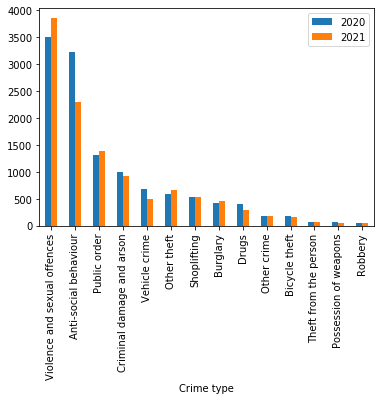

In [70]:
# Show the plot bar diagram on two year comparrisson

combined.plot.bar()

### Graph 12 : Crime types as at Sep, 2020 vs 2021

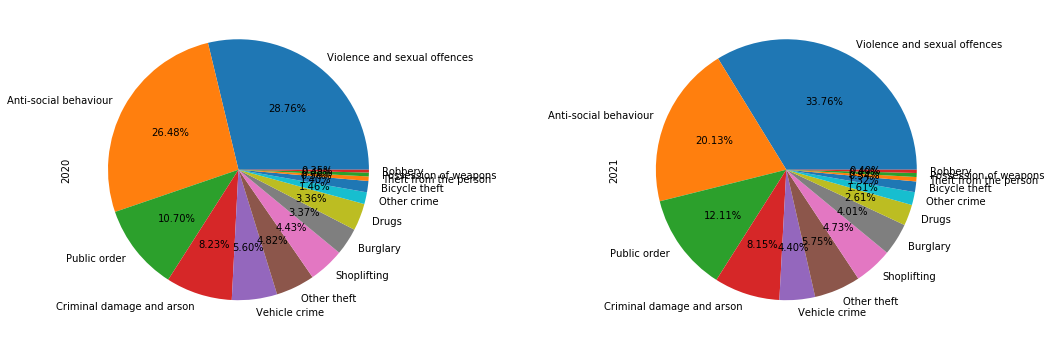

In [72]:
#plot = combined.groupby(['Crime type']).sum().plot(kind = "pie",y="Counts",legend=False,figsize=(10,10),autopct="%.2f%%", title =('Sep-2020'))
plot = combined.plot.pie(subplots=True, legend=False,figsize=(18,6),autopct="%.2f%%")

### Analysis 6 : Analysis of 'Violence and sexual offences' crime type movement in 2021

In [73]:
# Crate new dataframe according to the selected one crime type
streetcrime_crtype1_df = streetcrime_df_2021[streetcrime_df_2021['Crime type'] == 'Violence and sexual offences']
streetcrime_crtype1_df

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
150756,2021-01,South Wales Police,South Wales Police,-3.245889,51.776739,On or near Nightclub,Blaenau Gwent 006E,Violence and sexual offences
150766,2021-01,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Violence and sexual offences
150774,2021-01,South Wales Police,South Wales Police,-3.652512,51.638274,On or near George Street,Bridgend 001B,Violence and sexual offences
150775,2021-01,South Wales Police,South Wales Police,-3.655989,51.636130,On or near Dan-Y-Bryn,Bridgend 001B,Violence and sexual offences
150776,2021-01,South Wales Police,South Wales Police,-3.655989,51.636130,On or near Dan-Y-Bryn,Bridgend 001B,Violence and sexual offences
...,...,...,...,...,...,...,...,...
261903,2021-09,South Wales Police,South Wales Police,-3.546744,50.495334,On or near Montserrat Rise,Torbay 003D,Violence and sexual offences
261904,2021-09,South Wales Police,South Wales Police,-3.044342,51.707166,On or near Michael Court,Torfaen 004D,Violence and sexual offences
261905,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences
261906,2021-09,South Wales Police,South Wales Police,-3.005150,51.659476,On or near Meadow Lane,Torfaen 008C,Violence and sexual offences


In [74]:
# Count crime occurance according to the month
streetcrime_crtype2_df = streetcrime_crtype1_df['Month'].value_counts()
# Reset the index
streetcrime_crtype2_df = streetcrime_crtype2_df.reset_index()
# Add Month and Count new columns
streetcrime_crtype2_df.columns = ['Month', 'Counts']
# Sort values according to the 'Month'
streetcrime_crtype2_df = streetcrime_crtype2_df.sort_values(by ='Month')
streetcrime_crtype2_df

,Month,Counts
7,2021-01,2816
8,2021-02,2710
6,2021-03,3241
5,2021-04,3361
3,2021-05,3853
2,2021-06,3939
1,2021-07,3988
0,2021-08,4016
4,2021-09,3849


### Graph 13 : Movement of crime type 'Violence and sexual offences' in 2021 

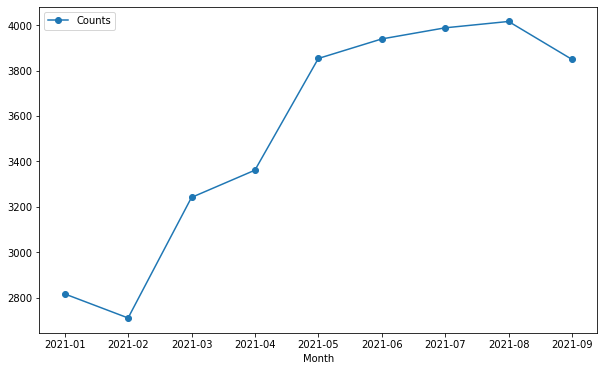

In [75]:
# Show the plot diagram
streetcrime_crtype2_df.plot(x='Month', y='Counts', figsize= (10,6), marker="o" )

In [76]:
# Filter the data to plot the map for the selected crime type

streetcrime_df2_2021 = streetcrime_df_2021[streetcrime_df_2021['Crime type'] == 'Violence and sexual offences']
streetcrime_df2_2021 = streetcrime_df2_2021[streetcrime_df2_2021['Month'] == '2021-09']
streetcrime_df3_2021 = streetcrime_df2_2021.head(1500)
streetcrime_df3_2021

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
250521,2021-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Violence and sexual offences
250522,2021-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Violence and sexual offences
250523,2021-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Violence and sexual offences
250524,2021-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Violence and sexual offences
250525,2021-09,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Violence and sexual offences
...,...,...,...,...,...,...,...,...
255436,2021-09,South Wales Police,South Wales Police,-3.409011,51.742598,On or near Beechwood Drive,Merthyr Tydfil 003B,Violence and sexual offences
255437,2021-09,South Wales Police,South Wales Police,-3.412444,51.744931,On or near Mayors Close,Merthyr Tydfil 003B,Violence and sexual offences
255446,2021-09,South Wales Police,South Wales Police,-3.372765,51.753862,On or near Dol Fieri,Merthyr Tydfil 003C,Violence and sexual offences
255447,2021-09,South Wales Police,South Wales Police,-3.376252,51.756087,On or near Tramroad Lane,Merthyr Tydfil 003C,Violence and sexual offences


### Analysis 7 : Plot crime location on a map for first 1500 records of the crime type 'Violence and sexual offences'

In [78]:
# Show the points in the map for first 1500 records

map = folium.Map(location=[streetcrime_df3_2021.Latitude.mean(), streetcrime_df3_2021.Longitude.mean()], 
                 zoom_start=9, control_scale=True)
for index, location_info in streetcrime_df3_2021.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Location"]).add_to(map)
map

### Analysis 8 : Plot all crime location on a map for the month of September 2021

In [79]:
# Show the diagram according to one month
periodic_df = streetcrime_df_2021[streetcrime_df_2021['Month'] == '2021-09']
crime_locations = list(zip(periodic_df.Latitude, periodic_df.Longitude))
base_map = folium.Map(location=[periodic_df.Latitude.mean(), periodic_df.Longitude.mean()], zoom_start=10)
heatmap = plugins.HeatMap(crime_locations, radius=5, blur=2)
base_map.add_child(heatmap)

In [80]:
### Thank you